In [77]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import random
import matplotlib.pyplot as plt

# LOAD DATASET

In [78]:
X_train = np.loadtxt("./dataset/input.csv",delimiter=',')
Y_train = np.loadtxt("./dataset/labels.csv",delimiter=',')

X_test = np.loadtxt("./dataset/input_test.csv",delimiter=',')
Y_test = np.loadtxt("./dataset/labels_test.csv",delimiter=',')

In [79]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [80]:
X_train = X_train/255
X_test = X_test/255

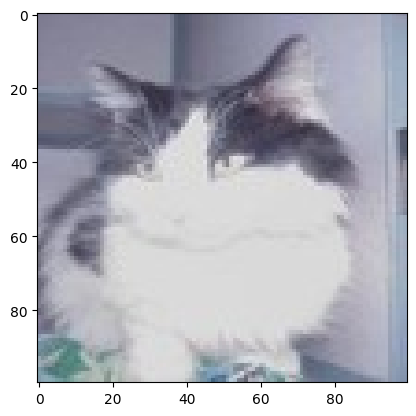

In [81]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx][:][:][:])
plt.show()

# Model

### Cara Pertama

In [82]:
# Inisialisasi model Sequential
model = Sequential([
    # Layer Conv2D pertama dengan 32 filter, masing-masing berukuran (3,3)
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    
    # Layer MaxPooling2D untuk mereduksi dimensi spasial gambar jadi 2x2
    MaxPooling2D((2, 2)),
    
    # Layer Conv2D kedua dengan 32 filter, masing-masing berukuran (3,3)
    Conv2D(32, (3, 3), activation='relu'),
    
     # Layer MaxPooling2D untuk mereduksi dimensi spasial gambar jadi 2x2
    MaxPooling2D((2, 2)),
    
    # Layer Flatten untuk mengubah array 2D menjadi vektor 1D
    Flatten(),
    
    # Layer Dense (fully connected) dengan 64 unit dan fungsi aktivasi ReLU
    Dense(64, activation='relu'),
    
    # Layer Dense terakhir dengan 1 unit dan fungsi aktivasi sigmoid (binary classification)
    Dense(1, activation='sigmoid')
])

### Cara Kedua

In [1]:
# Inisialisasi model Sequential
model = Sequential()

# Tambahkan layer Conv2D pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))

# Tambahkan layer MaxPooling2D pertama
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer Conv2D kedua
model.add(Conv2D(32, (3, 3), activation='relu'))

# Tambahkan layer MaxPooling2D kedua
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer Flatten
model.add(Flatten())

# Tambahkan layer Dense (fully connected) dengan 64 unit dan aktivasi ReLU
model.add(Dense(64, activation='relu'))

# Tambahkan layer Dense terakhir dengan 1 unit dan aktivasi sigmoid (binary classification)
model.add(Dense(1, activation='sigmoid'))

NameError: name 'model' is not defined

In [86]:
model.compile(loss= 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [87]:
model.fit(X_train,Y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 [==============================] - 6s 174ms/step - loss: 0.7408 - accuracy: 0.4895
Epoch 2/10
32/32 [==============================] - 5s 166ms/step - loss: 0.6639 - accuracy: 0.6065
Epoch 3/10
32/32 [==============================] - 5s 159ms/step - loss: 0.6127 - accuracy: 0.6765
Epoch 4/10
32/32 [==============================] - 5s 164ms/step - loss: 0.5704 - accuracy: 0.7075
Epoch 5/10
32/32 [==============================] - 5s 170ms/step - loss: 0.5125 - accuracy: 0.7525
Epoch 6/10
32/32 [==============================] - 6s 180ms/step - loss: 0.4479 - accuracy: 0.7930
Epoch 7/10
32/32 [==============================] - 5s 170ms/step - loss: 0.3768 - accuracy: 0.8445
Epoch 8/10
32/32 [==============================] - 5s 171ms/step - loss: 0.3326 - accuracy: 0.8490
Epoch 9/10
32/32 [==============================] - 6s 174ms/step - loss: 0.2608 - accuracy: 0.8880
Epoch 10/10
32/32 [==============================] - 6s 182ms/step - loss: 0.1935 - accuracy: 0.9190

In [89]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 21ms/step - loss: 0.9105 - accuracy: 0.6400


[0.9105418920516968, 0.6399999856948853]

## Making Predictions

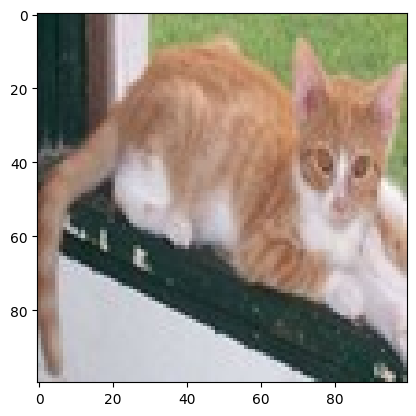

1/1 [==============================] - 0s 18ms/step
Result :  cat


In [109]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))

y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("Result : ", pred)